In [1]:
import numpy  
import math
import random
import scipy.linalg as sla
import scipy
import time
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib
%matplotlib inline
from __future__ import division

In [2]:
R  = [[0 for j in range(4)] for i in range(4)]    #матрица для аналитического решения
R[0][0] = 2.
R[1][0] = math.exp(1./2.)
R[1][1] = math.exp(-1./2.)
R[1][2] =-math.exp(2**(-3./2.))
R[1][3] =-math.exp(-2**(-3./2.))
R[2][0] = math.exp(1./2.)
R[2][1] =-math.exp(-1./2.)
R[2][2] =-math.exp(2**(-3./2.)) * 2**.5
R[2][3] = math.exp(-2**(-3./2.))* 2**.5
R[3][2] = math.exp(2**(-1./2.))
R[3][3] = math.exp(-2**(-1./2.))
R = numpy.array(R)

In [3]:
#общие решения уравнений
def u_1(tt,aa,f1):   
    return [(aa[0]*math.exp(_t) + aa[1]*math.exp(-_t) + f1(_t,aa)) for _t in filter(lambda x:x<.5,tt)]
def u_2(tt,aa,f2):
    return [(aa[2]*math.exp(t/2.**.5) + aa[3]*math.exp(-t/2.**.5) + f2(t,aa)) for t in filter(lambda x:x>=.5,tt)]

# Отчет о численном решении краевой задачи для нелинейного дифференциального уравнения

### Шагадатов Нурлан, 412

Аппроксимировать задачу с помощью метода конечных элементов (кусочно квадратичных), найти решение полученной системы при разных $h$ и $f$:

$$ Lu := -(ku')' + u = f $$
$$ u(0) + u'(0) = u(1) = 0 $$
$$ k = \left\{ 
\begin{aligned}
1, x \leq 0.5 \\
2, x > 0.5 \\
\end{aligned} 
\right. $$

1. $f(x) \equiv 1$
2. $f(x) = \left\{ 
\begin{aligned}
1, x \leq 0.5 \\
2, x > 0.5 \\
\end{aligned} 
\right. $
3. $f(x)=x$

### Аналитическое решение

Будем искать решение $ u = u_1I[0,0.5]+u_2I(0.5,1] $, при условиях:

1. $-u_1'' + u_1 = f\vert_{[0,0.5]}$
2. $-2u_2'' + u_2 = f\vert_{[0.5,1]}$
3. $u_1(0)+u_1'(0) = 0$
4. $u_2(1) = 0$
5. $u_1(\frac{1}{2}) = u_2(\frac{1}{2})$
6. $u_1'(\frac{1}{2}) = 2u_2'(\frac{1}{2})$

Условия 1. и 2. дают общий вид для $u_1$ и $u_2$: 

$u_1(x) = a_1e^x + b_1e^{-x} + f_1(x)$ 

$u_2(x) = a_2e^{x/\sqrt2} + b_2e^{-x/\sqrt2} + f_2(x)$, 

где $a_1, a_2, b_1, b_2$ -- неизвестные константы, $f_1, f_2$ -- частные решения уравнений 1. и 2., которые легко находятся, если знать $f$.

Условия 3. -- 6. дают систему уравнений на неизвестные коэффициенты $a_1, a_2, b_1, b_2$. Решив эту систему, найдем $u$.

Так как в системе уравнений 3. -- 6. коэффициенты получаются сложными для вычисления вручную, решение было получено с помощью компьютера. 

Ниже приведены графики решений задачи для различных $f$

##### 1. $f \equiv 1 \Rightarrow f_1 = f_2 = 1$ 

$u(x) = 1+(-0.5e^x + 0.17720102e^{-x})I[0,0.5]+(-0.4830327e^{x/\sqrt2} + -0.04128056e^{-x/\sqrt2})I(0.5,1]$ 

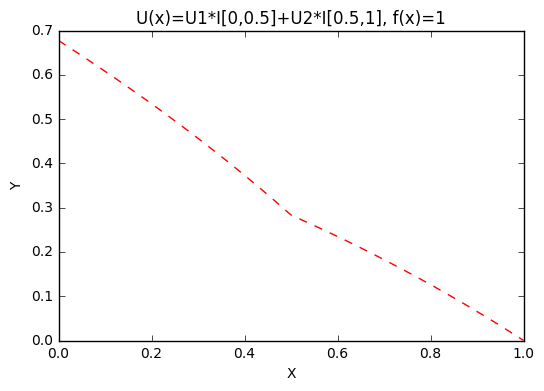

In [4]:
def f1(t,aa):
    return 1
def f2(t,aa):
    return 1

c1 = numpy.transpose(numpy.array([-1, 0, 0, -1]))
aa1 = sla.solve(R, c1)
tt = [0.0001*i for i in range(10000)]

u1g, = plt.plot(tt, u_1(tt,aa1,f1)+u_2(tt,aa1,f2), 'r--')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('U(x)=U1*I[0,0.5]+U2*I[0.5,1], f(x)=1')
plt.show()

##### 2. $f = \left\{ 
\begin{aligned}
1, x \leq 0.5 \\
2, x > 0.5 \\
\end{aligned} 
\right. \Rightarrow f_1 = 1, f_2 = 2$

$u(x) = (-0.5e^x + 0.30607996e^{-x}+1)I[0,0.5]+(-0.82608858e^{x/\sqrt2} -0.6583208e^{-x/\sqrt2}+2)I(0.5,1]$ 

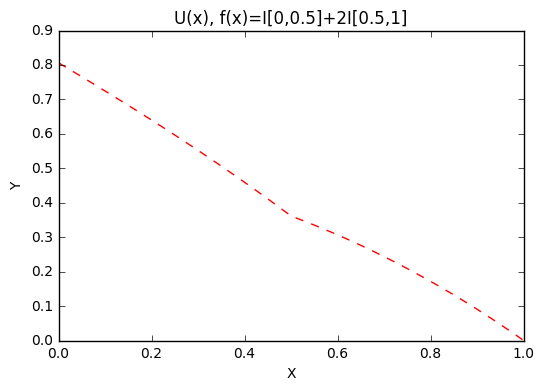

In [5]:
def f1(t,aa):
    return 1
def f2(t,aa):
    return 2
c2 = numpy.transpose(numpy.array([-1, 1, 0, -2]))
aa2 = sla.solve(R, c2)
tt = [0.0001*i for i in range(10000)]
u1g, = plt.plot(tt, u_1(tt,aa2,f1)+u_2(tt,aa2,f2), 'r--')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('U(x), f(x)=I[0,0.5]+2I[0.5,1]')
plt.show()

##### 3. $f = x\Rightarrow f_1 = f_2 = x$
$u(x) = x+(-0.5e^x + 0.69807561,e^{-x}+1)I[0,0.5]+(-0.69880612e^{x/\sqrt2} +0.84624956e^{-x/\sqrt2}+2)I(0.5,1]$ 

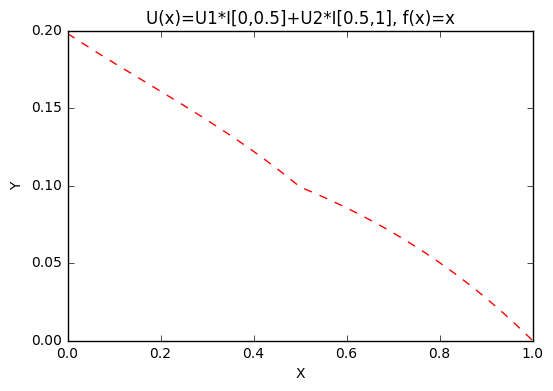

In [6]:
def f1(t,aa):
    return 1.*t
def f2(t,aa):
    return 1.*t
c3 = numpy.transpose(numpy.array([-1., 0, 1., -1.]))
aa3 = sla.solve(R, c3)
tt = [0.0001*i for i in range(10000)]
u1g, = plt.plot(tt, u_1(tt,aa3,f1)+u_2(tt,aa3,f2), 'r--')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('U(x)=U1*I[0,0.5]+U2*I[0.5,1], f(x)=x')
plt.show()

### Численное решение

In [7]:
#Матрица Жесткости
def K(N):
    #локальные матрицы жесткости
    K_1=numpy.array([[7,-8,1],[-8,16,-8],[1,-8,7]])*N/3+numpy.array([[4,2,-1],[2,16,2],[-1,2,4]])/(30*N)
    K_2=numpy.array([[14,-16,2],[-16,32,-16],[2,-16,14]]) *N/3 +numpy.array([[4,2,-1],[2,16,2],[-1,2,4]])/(30*N)
    #Глобальная матрица жесткости(для начала зануляем)
    a=numpy.array([[0 for i in range(2*N+1)] for j in range(2*N+1)]).astype('float') 
    #матрица индексов
    L=numpy.array([[i*2+j+1 for i in range(N)] for j in range(3)])     
    #print L
    for m in range(3):
        for n in range(3):
            for i in range(N):
                if i<N/2:
                    a[L[m][i]-1][L[n][i]-1]+=K_1[m][n]
                else:
                    a[L[m][i]-1][L[n][i]-1]+=K_2[m][n]
    a = numpy.delete(a, (2*N), axis=0)              #выкидываем последнюю строку и последний столбец(граничные условия) 
    a = numpy.delete(a, (2*N), axis=1)
    a[0][0]-=1
    return a

In [8]:
#функции которыми приближаем
def phi1(N,i,x):
    t=(x-(i-1)/N)*N
    return 2*(t-1)*(t-0.5)
def phi2(N,i,x):
    t=(x-(i-1)/N)*N
    return 4*t*(1-t)
def phi3(N,i,x):
    t=(x-(i-1)/N)*N
    return 2*t*(t-0.5)

##### 1. $f \equiv 1$

In [9]:
def F1(N):                                                 #Глобальный вектор нагрузки (f(x)==1)
    F_1=numpy.array([1,4,1])/(6*N)
    F_2=numpy.array([1,4,1])/(6*N)
    b=numpy.array([0 for i in range(2*N+1)]).astype('float')
    L=numpy.array([[i*2+j+1 for i in range(N)] for j in range(3)])
    for m in range(3):
        for i in range(N):
            if i<=N/2:
                b[L[m,i]-1]+=F_1[m]
            else:
                b[L[m,i]-1]+=F_2[m]
    b = numpy.delete(b, (2*N), axis=0) 
    return b 

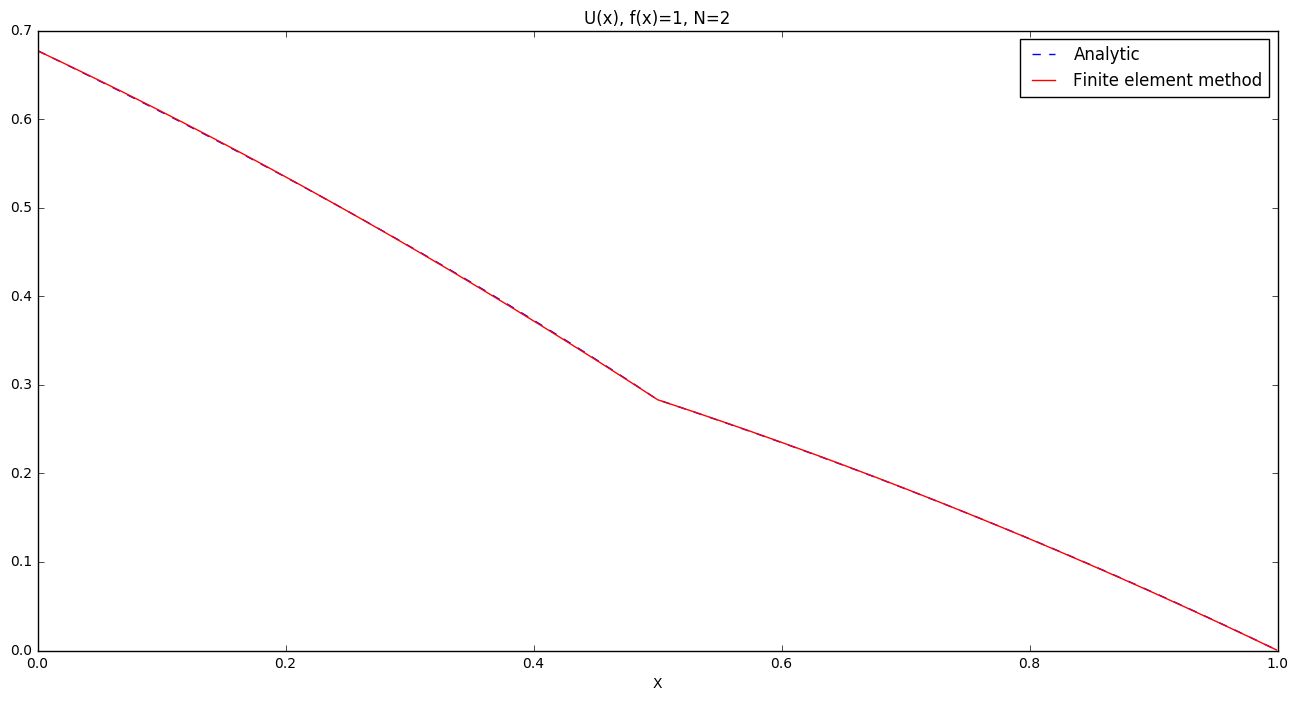

0.0130439946725


In [10]:
def e_i(N,tt):                                    #номер элемента разбиения
    if tt!=1:
        return int(tt*N+1)
    else:
        return N
def f1(t,aa):
    return 1
def f2(t,aa):
    return 1
def u(N,tt,u1):
    k=[]
    for i in range(len(tt)):
        p=e_i(N,tt[i])
        if p!=N:
            k.append((u1[2*p-2]*phi1(N,p,tt[i])+u1[2*p-1]*phi2(N,p,tt[i])+u1[2*p]*phi3(N,p,tt[i])))
        else:
            k.append((u1[2*N-2]*phi1(N,N,tt[i])+u1[2*N-1]*phi2(N,N,tt[i])))
    return numpy.array(k)
N=2
u1 = sla.solve(K(N), F1(N))
tt = numpy.arange(0., 1., .001)
uu = u(N,tt,u1)
plt.figure(figsize=(16, 8))
c1 = numpy.transpose(numpy.array([-1, 0, 0, -1]))
aa1 = sla.solve(R, c1)
U=u_1(tt,aa1,f1)+u_2(tt,aa1,f2)
p1=plt.plot(tt, U, 'b--',label="Analytic")
p2=plt.plot(tt, uu, 'r',label="Finite element method")
plt.xlabel('X')
plt.title('U(x), f(x)=1, N='+str(N))
plt.legend()
plt.show()
H=numpy.linalg.norm(U-uu)
print H

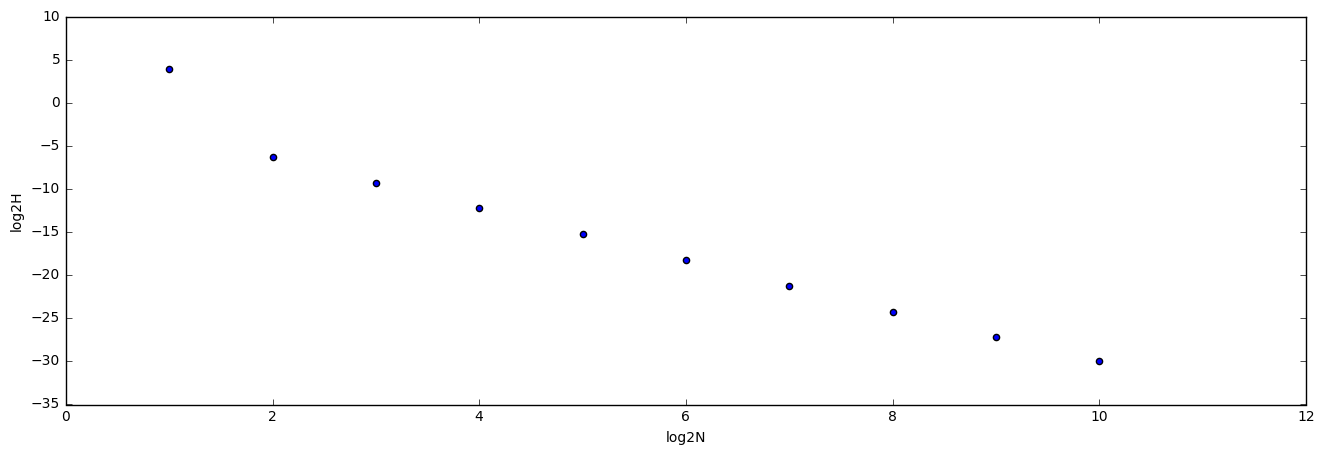

In [11]:
#график зависимости логарифма ошибки от логорифма N (log2)
H1=[]
for i in range(10):
    N=2**i
    u1 = sla.solve(K(N), F1(N))
    tt = numpy.arange(0., 1., .001)
    uu = u(N,tt,u1)
    c1 = numpy.transpose(numpy.array([-1, 0, 0, -1]))
    aa1 = sla.solve(R, c1)
    U=u_1(tt,aa1,f1)+u_2(tt,aa1,f2)
    H1.append(math.log(numpy.linalg.norm(U-uu),2))
plt.figure(figsize=(16, 5))
plt.scatter([1,2,3,4,5,6,7,8,9,10],H1)
plt.xlabel('log2N')
plt.ylabel('log2H')
plt.show()

##### 2. $f = \left\{ 
\begin{aligned}
1, x \leq 0.5 \\
2, x > 0.5 \\
\end{aligned} 
\right. $

In [12]:
def F2(N):                                                 #Глобальный вектор нагрузки  (кусочная)
    F_1=numpy.array([1,4,1])/(6*N)
    F_2=numpy.array([2,8,2])/(6*N)
    b=numpy.array([0 for i in range(2*N+1)]).astype('float')
    L=numpy.array([[i*2+j+1 for i in range(N)] for j in range(3)])
    for m in range(3):
        for i in range(N):
            if i<N/2:
                b[L[m,i]-1]+=F_1[m]
            else:
                b[L[m,i]-1]+=F_2[m]
    b = numpy.delete(b, (2*N), axis=0) 
    return b  

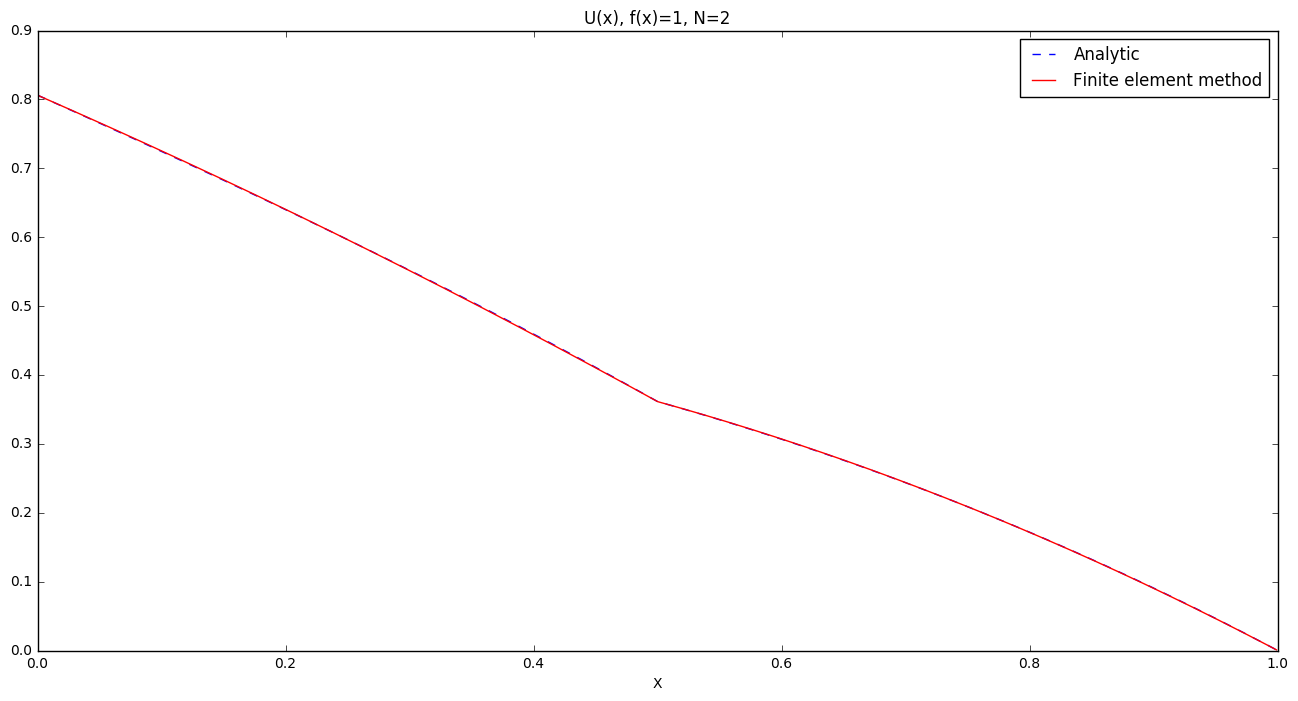

0.0149595659416


In [13]:
def e_i(N,tt):                                    #номер элемента разбиения
    if tt!=1:
        return int(tt*N+1)
    else:
        return N
def f1(t,aa):
    return 1.
def f2(t,aa):
    return 2.
def u(N,tt,u1):
    k=[]
    for i in range(len(tt)):
        p=e_i(N,tt[i])
        if p!=N:
            k.append((u1[2*p-2]*phi1(N,p,tt[i])+u1[2*p-1]*phi2(N,p,tt[i])+u1[2*p]*phi3(N,p,tt[i])))
        else:
            k.append((u1[2*N-2]*phi1(N,N,tt[i])+u1[2*N-1]*phi2(N,N,tt[i])))
    return numpy.array(k)
N=2
u2 = sla.solve(K(N), F2(N))
tt = numpy.arange(0., 1., .001)
uu_ = u(N,tt,u2)
plt.figure(figsize=(16, 8))
c2 = numpy.transpose(numpy.array([-1, 1, 0, -2]))
aa1 = sla.solve(R, c2)
U=u_1(tt,aa1,f1)+u_2(tt,aa1,f2)
p1=plt.plot(tt,U , 'b--',label="Analytic")
p2=plt.plot(tt, uu_, 'r',label="Finite element method")
plt.xlabel('X')
plt.title('U(x), f(x)=1, N='+str(N))
plt.legend()
plt.show()
H=numpy.linalg.norm(U-uu_)
print H

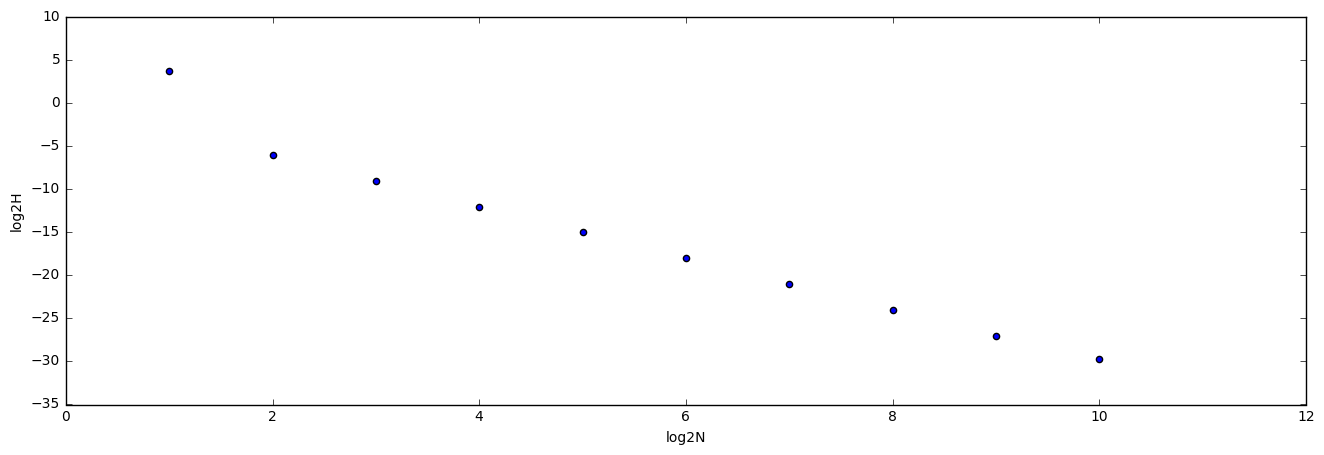

In [14]:
H2=[]
for i in range(10):
    N=2**i
    u2 = sla.solve(K(N), F2(N))
    tt = numpy.arange(0., 1., .001)
    uu_ = u(N,tt,u2)
    c2 = numpy.transpose(numpy.array([-1, 1, 0, -2]))
    aa1 = sla.solve(R, c2)
    U=u_1(tt,aa1,f1)+u_2(tt,aa1,f2)
    H2.append(math.log(numpy.linalg.norm(U-uu_),2))
plt.figure(figsize=(16, 5))
plt.scatter([1,2,3,4,5,6,7,8,9,10],H2)
plt.xlabel('log2N')
plt.ylabel('log2H')
plt.show()

##### 3. $f = x$

In [15]:
def integrand_1(x,N,i):
    return 2*x*((x-(i-1)/N)*N-1)*((x-(i-1)/N)*N-1/2)
def integrand_2(x,N,i):
    return 4*x*((x-(i-1)/N)*N)*(1-(x-(i-1)/N)*N)
def integrand_3(x,N,i):
    return 2*x*((x-(i-1)/N)*N)*((x-(i-1)/N)*N-1/2)
def F3(N):
    b=numpy.array([0 for i in range(2*N+1)]).astype('float')
    L=numpy.array([[i*2+j+1 for i in range(N)] for j in range(3)])
    F=numpy.array([[0 for i in range(3)] for j in range(N)]).astype('float')
    for i in range (N):
        j=i+1
        F[i][0]=integrate.quad(integrand_1, (j-1)/N, j/N,args=(N,j))[0]
        F[i][1]=integrate.quad(integrand_2, (j-1)/N, j/N,args=(N,j))[0]
        F[i][2]=integrate.quad(integrand_3, (j-1)/N, j/N,args=(N,j))[0]
    for m in range(3):
        for i in range(N):
            b[L[m,i]-1]+=F[i][m]
    b = numpy.delete(b, (2*N), axis=0) 
    return b 

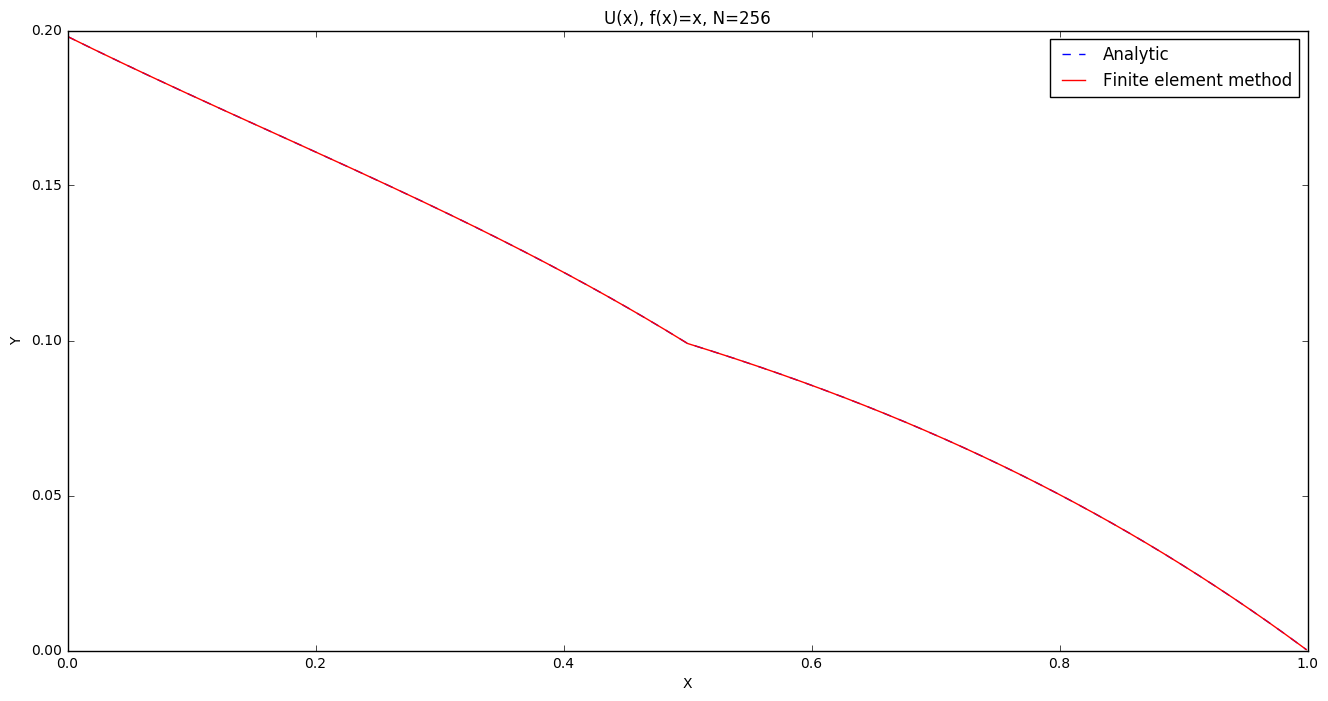

1.0270075318e-08


In [16]:
def e_i(N,tt):                                    #номер элемента разбиения
    if tt!=1:
        return int(tt*N+1)
    else:
        return N
def f1(t,aa):
    return t*1.
def f2(t,aa):
    return t*1.
def u(N,tt,u1):
    k=[]
    for i in range(len(tt)):
        p=e_i(N,tt[i])
        if p!=N:
            k.append((u1[2*p-2]*phi1(N,p,tt[i])+u1[2*p-1]*phi2(N,p,tt[i])+u1[2*p]*phi3(N,p,tt[i])))
        else:
            k.append((u1[2*N-2]*phi1(N,N,tt[i])+u1[2*N-1]*phi2(N,N,tt[i])))
    return numpy.array(k)
N=256
u1 = sla.solve(K(N), F3(N))
uu = u(N,tt,u1)
plt.figure(figsize=(16, 8))
c3 = numpy.transpose(numpy.array([-1., 0, 1., -1.]))
aa3 = sla.solve(R, c3)
tt = [0.001*i for i in range(1000)]
U=u_1(tt,aa3,f1)+u_2(tt,aa3,f2)
p1=plt.plot(tt, U, 'b--',label="Analytic")
p2=plt.plot(tt, uu, 'r',label="Finite element method")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('U(x), f(x)=x, N='+str(N))
plt.legend()
plt.show()
H=numpy.linalg.norm(U-uu)
print H

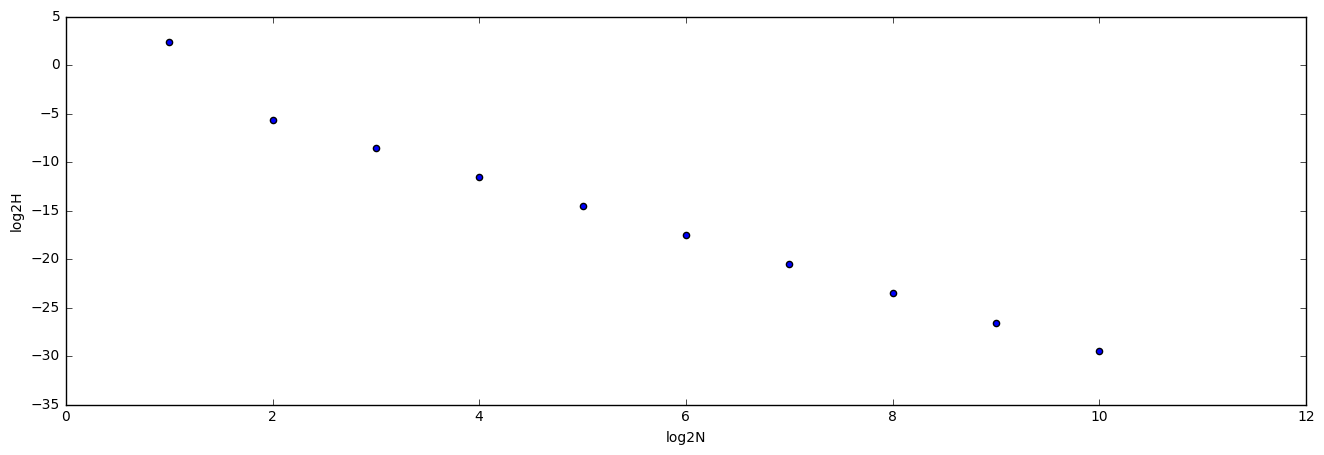

In [17]:
H3=[]
for i in range(10):
    N=2**i
    u2 = sla.solve(K(N), F3(N))
    tt = numpy.arange(0., 1., .001)
    uu_ = u(N,tt,u2)
    c3 = numpy.transpose(numpy.array([-1., 0, 1., -1.]))
    aa3 = sla.solve(R, c3)
    U=u_1(tt,aa3,f1)+u_2(tt,aa3,f2)
    H3.append(math.log(numpy.linalg.norm(U-uu_),2))
plt.figure(figsize=(16, 5))
plt.scatter([1,2,3,4,5,6,7,8,9,10],H3)
plt.xlabel('log2N')
plt.ylabel('log2H')
plt.show()